In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import time

#XT Software tools
from xt_python_basics import ObjectBroker
from xt_python_module_mmu.coordinates import Pose
from xt_python_module_mmu.patterns import spiral_equidistant

#Devices:
import xt_python_module_mmu.provide_mmu

from xt_python_module_mmu.coordinates import Pose, Joints
from xt_python_basics import ObjectBroker
mmu = ObjectBroker.request("mmu_0")

import CT440_Lib

In [ ]:
def show_image(image):
    img_show = image
    #img_show[img_show > 255] = 255
    img_show = np.round(img_show)
    img_show = np.uint8(img_show)

    shape = np.shape(img_show)
    if len(shape) >= 3:
        depth = shape[2]
    else:
        depth = 1

    if depth == 1:
        img_show = cv2.cvtColor(img_show, cv2.COLOR_GRAY2RGB)
    else:
        img_show = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)  # opencv zo matplotlib

    plt.figure(num=None, figsize=(1280 / 80, 1024 / 80), dpi=80)
    plt.imshow(img_show)
    plt.show()

In [ ]:
import xt_python_basics.provide_cameras

from xt_python_basics import ObjectBroker
camera = ObjectBroker.request("camera_test")

In [ ]:
print(camera.exposure_time)

In [ ]:
camera.exposure_time = 0.05
camera.frame_rate = 40
camera.gain = 3

In [ ]:
image = camera.get_image()
show_image(image)

In [ ]:
vgu = ObjectBroker.request("vgu")
print(vgu.grip)

In [ ]:
vgu.grip = False

In [ ]:
vgu.grip = True

In [ ]:
# save gantry pos: x=377.1007, y=201.2211, z=-216.729)

In [ ]:
#EuclideanSpace(x=379.2379, y=200.2208, z=-227.014)

In [ ]:

import matplotlib.pyplot as plt
from jupyterplot import ProgressPlot

In [ ]:
#################################################################
GPIB_Addr = 10          # GPIB address of the T100S-HP laser
WL_Start = 1500.0       # Start wavelength
WL_Stop = 1630.0        # Stop wavelength
sweep_speed = 100       # Laser sweep speed in nm/s
TLS_Power = 10.0        # Laser power in mW
#################################################################

In [ ]:
ct440 = CT440_Lib.CT440(GPIB_Addr = GPIB_Addr,
                        WL_Start = WL_Start,
                        WL_Stop = WL_Stop,
                        sweep_speed = sweep_speed,
                        TLS_Power = TLS_Power)

In [ ]:
mmu.connect(ip="127.0.0.1", port=9998)

In [ ]:
mmu.disconnect()

In [ ]:
print(mmu.isConnected())

In [ ]:
print(mmu.posabs())

In [ ]:
Laser_wavelength = 1534
ct440.command_laser(Laser_wavelength, TLS_Power, laser_ON = False)
time.sleep(2)

In [ ]:
ct440.command_laser(Laser_wavelength, TLS_Power, laser_ON = False)

In [ ]:
def plot_xy_of_pose (pose_list, rotation_list, title):
    xs = [p.x for p in pose_list]
    ys = [p.y for p in pose_list]
 
    plt.figure(figsize=(10, 10))
    plt.subplot(111, aspect='equal')
    plt.ylim([-0.5, 0.5])
    plt.xlim([-0.5, 0.5])
    plt.xlabel("x   [mm]")
    plt.ylabel("y   [mm]")
    plt.title(title)
    plt.plot(xs, ys, 'bx-')
    for n in pose_list:
            rxs = [p.rx*4 + n.x for p in rotation_list]
            rys = [p.ry*4 + n.y for p in rotation_list]
            plt.plot(rxs, rys, '.-')

In [77]:
## Align initial position
# todo
#startPose = Pose(x=0.0, y=0.0, z=0.0, rx=0.0, ry=0.0, rz=0.0)
print(mmu.posabs())
startPose = Pose(x=0.2982999, y=-0.2154273, z=0.0999998, rx=2e-07, ry=5e-07, rz=-4e-07)

Pose(x=0.2982978, y=-0.2154257, z=0.1000001, rx=-5e-07, ry=-1.3e-06, rz=-4e-07)


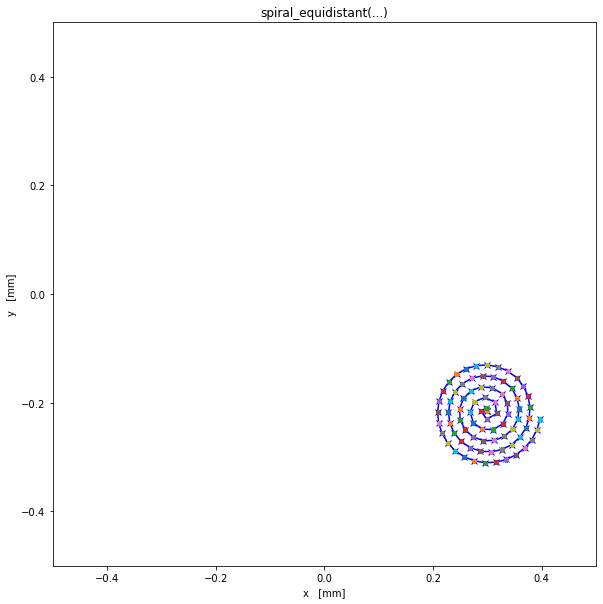

In [78]:
axesXY = (0, 1)
axesAB = (3,4)
stepsizeXY = 0.02
end_radiusXY = 0.1
stepsizeAB = 0.0001/180*np.pi
end_radiusAB = 0.001/180*np.pi
 
pathXY = list(spiral_equidistant(center=startPose, axes=axesXY, stepsize=stepsizeXY, end_radius=end_radiusXY))
pathRxRy = list(spiral_equidistant(center=startPose, axes=axesAB, stepsize=stepsizeAB, end_radius=end_radiusAB))
#todo merge pathXy and path RxRy

plot_xy_of_pose(pathXY, pathRxRy,  "spiral_equidistant(...)")

In [79]:
# aligment process
singal = []
for pos in pathXY:
    #for rot in pathAB:
        #pose = Pose(x=pos.x, y=pos.y, z = startPose.z, rx = rot.rx, ry = rot.ry, rz = startPose.rz)
    pose = Pose(x=pos.x, y=pos.y, z = startPose.z, rx = 0, ry = 0, rz = 0)
    mmu.movabs(pose)
    #po,p1,p2,_,_ = ct440.read_power_detectors() # todo correct snytax
    #signal.append(p1)

startPose = imax(signal)

NameError: name 'imax' is not defined

In [ ]:
mmu.softstop()

In [ ]:
#temp_pose = Pose(x=0, y=0, z = 0, rx = -1.9, ry = 0, rz = 0)
mmu.movabs(startPose)

In [75]:
mmu.movrel(Pose(x=0.0, y=-0.1, z=-0.0, rx=0, ry=-0.0, rz=0.0))

True

In [ ]:

Pout, P1, P2, _, _, _ = ct440.read_power_detectors()
print(P1)

In [ ]:
ct440.close()